In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
df = pd.read_csv('/content/gdpWorld.csv')

# Strip any leading/trailing spaces from column names and convert to lowercase
df.columns = df.columns.str.strip().str.lower()  # Convert column names to lowercase


# Adjust the features based on the cleaned column names
features = ['population', 'area (sq. mi.)', 'pop. density (per sq. mi.)', 'coastline (coast/area ratio)',
            'net migration', 'infant mortality (per 1000 births)']
target = 'gdp ($ per capita)'  # Adjusted to match the cleaned column name

In [29]:
# Drop rows with missing values in the selected features and target column
df = df.dropna(subset=features + [target])

# Convert features to numeric values, handling any potential non-numeric data
# Explicitly replace commas and spaces before converting to numeric
for feature in features:
    # Convert the column to string type before applying string methods
    df[feature] = df[feature].astype(str).str.replace(',', '').str.replace(' ', '').astype(float)

<ipython-input-29-93bcdf780929>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype(str).str.replace(',', '').str.replace(' ', '').astype(float)
<ipython-input-29-93bcdf780929>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].astype(str).str.replace(',', '').str.replace(' ', '').astype(float)
<ipython-input-29-93bcdf780929>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [30]:
# Prepare the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the Linear Regression model
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

Linear Regression MSE: 82523217.66775382
Linear Regression R2: 0.344073962195685


In [32]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 43531064.333333336
Random Forest R2: 0.6539984824086023


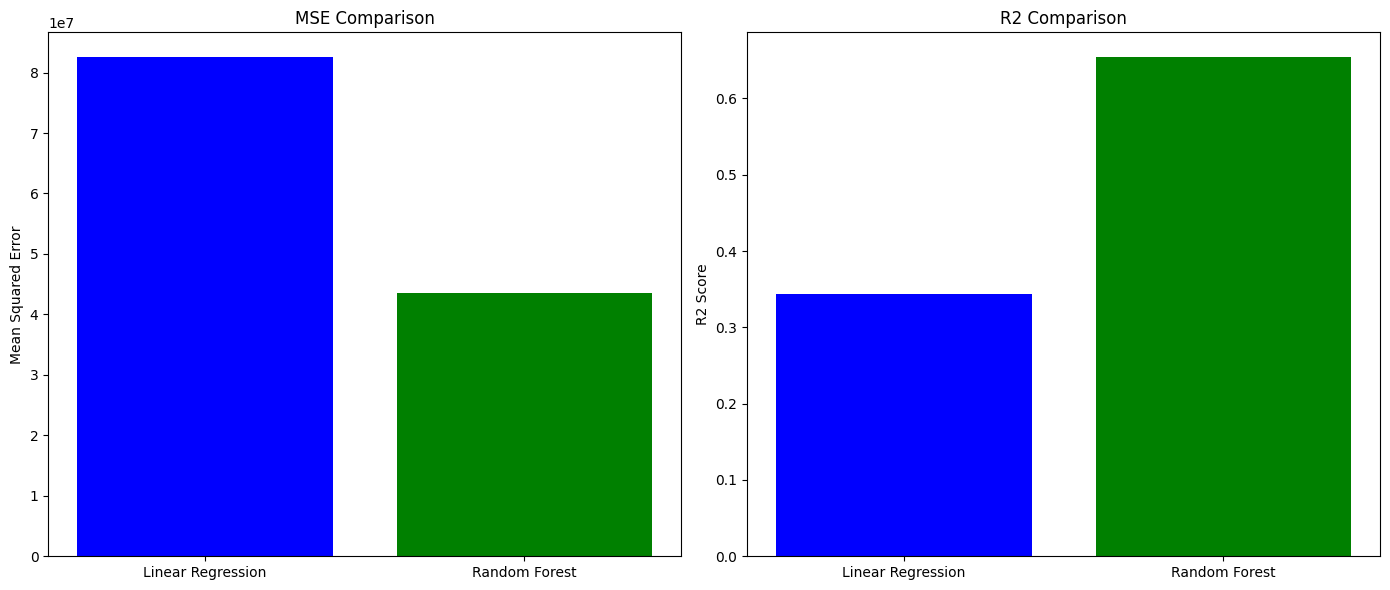

In [33]:
# Comparing the models (MSE and R2 values)
models = ['Linear Regression', 'Random Forest']
mse_values = [mse_linear, mse_rf]
r2_values = [r2_linear, r2_rf]

# Plotting the comparison of models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Comparison
ax[0].bar(models, mse_values, color=['blue', 'green'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('Mean Squared Error')

# R2 Comparison
ax[1].bar(models, r2_values, color=['blue', 'green'])
ax[1].set_title('R2 Comparison')
ax[1].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()